# МНК, полиномиальная регрессия

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

## 1. Полиномиальная регрессия

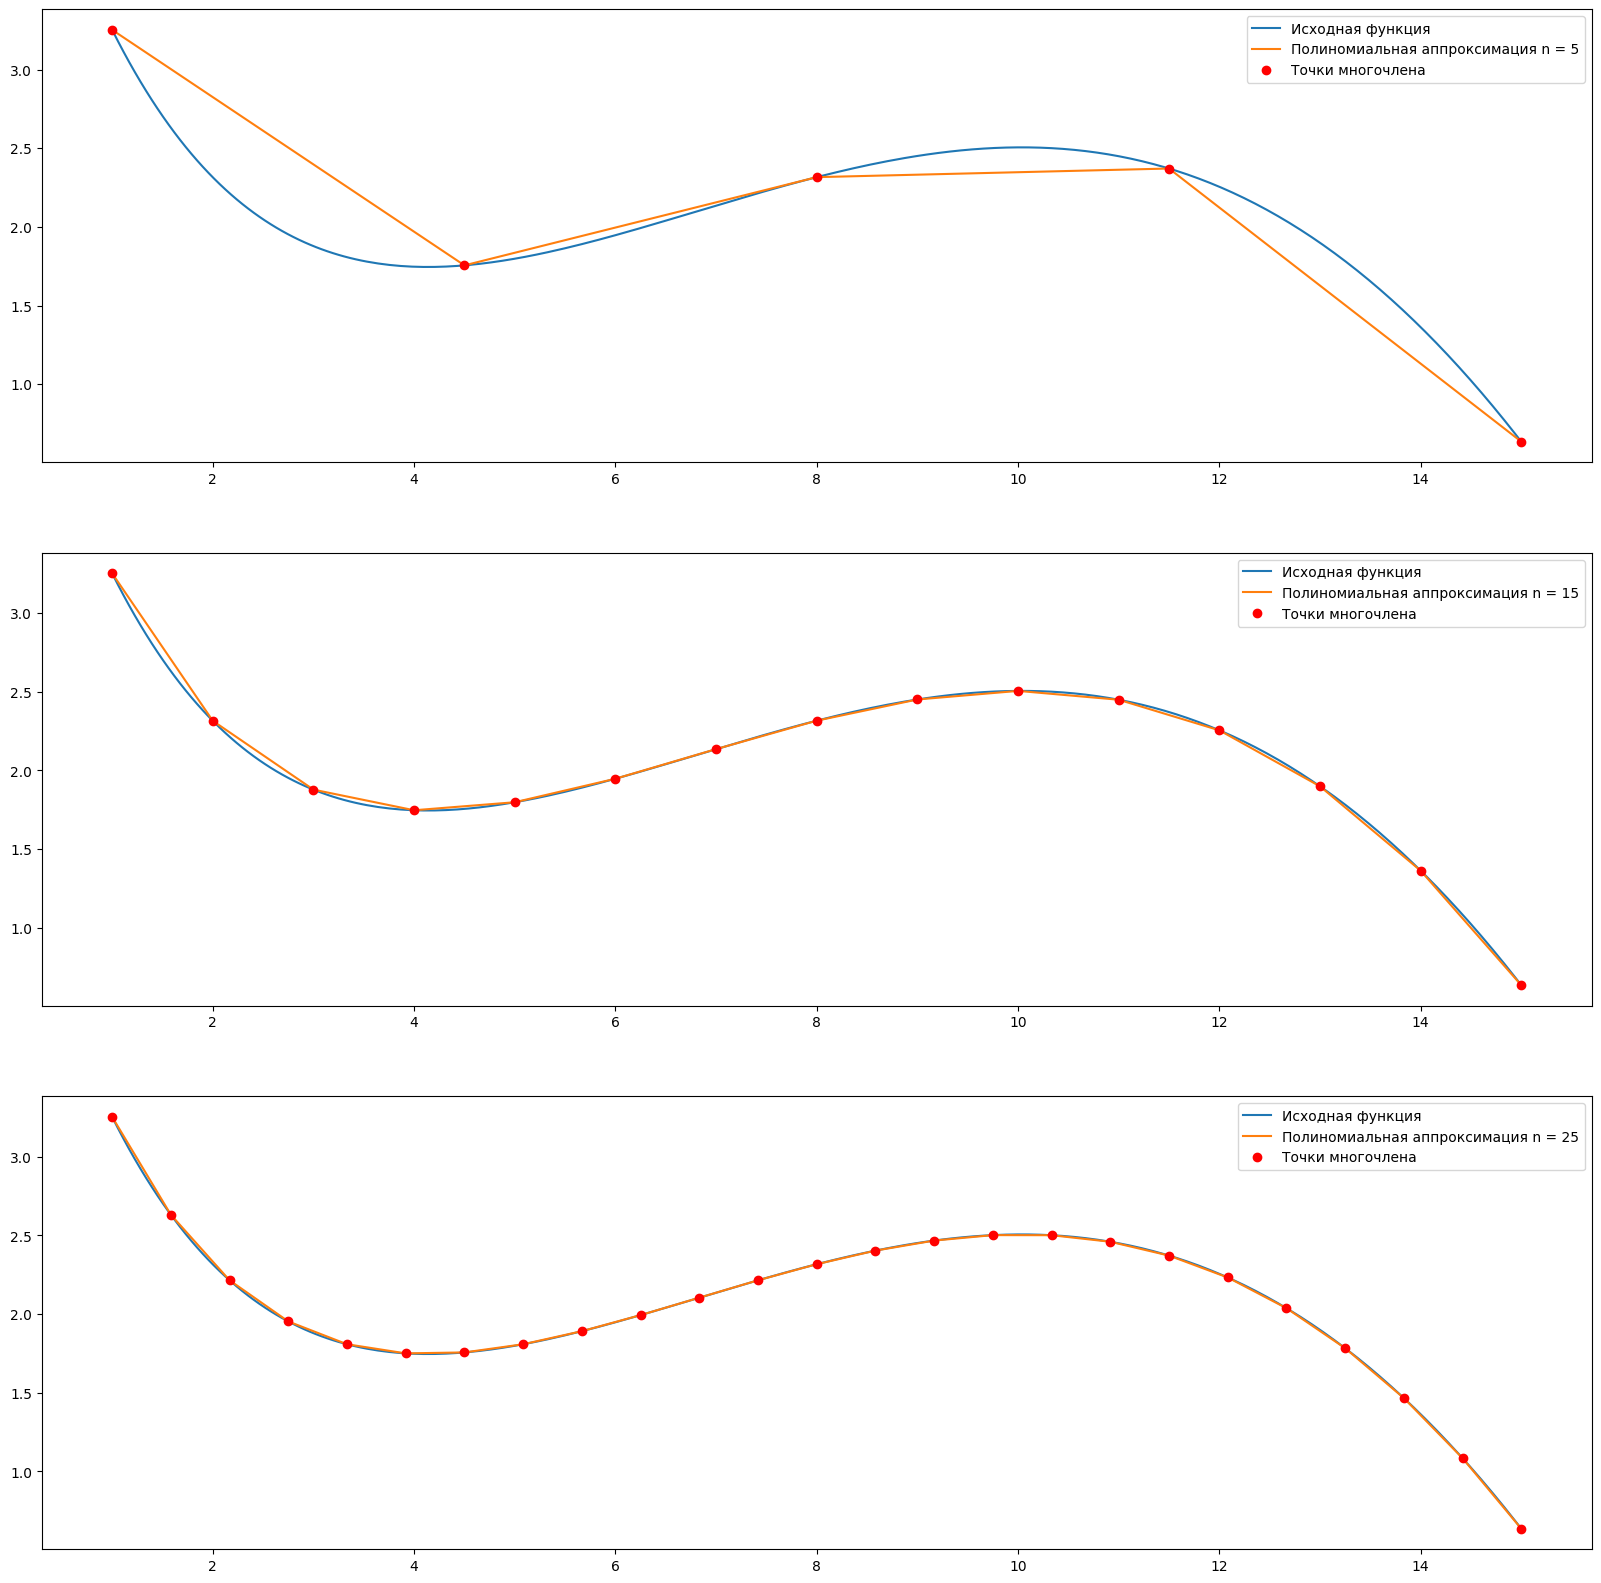

In [48]:
def func(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-1 / 2 * x)

def pol(n):
    t = np.linspace(1, 15, n)
    sol = np.linalg.solve(np.array([[x ** i for i in range(n)] for x in t]), func(t))
    polynomial = np.array([sum([sol[i] * x ** i for i in range(n)]) for x in t])
    return polynomial

fig, axes = plt.subplots(3, figsize=(20, 20))
xx = np.linspace(1, 15, 250)
yy = func(xx)

i = 0
for n in range(5, 30, 10):
    axes[i].plot(xx, yy, label = 'Исходная функция')
    x = np.linspace(1, 15, n)
    y, b = pol(n), func(x)
    axes[i].plot(x, y, label = f'Полиномиальная аппроксимация n = {n}')
    axes[i].plot(x, b, "ro", label = 'Точки многочлена')
    axes[i].legend()
    i += 1

### С увеличением колличества точек n, полином лучше приближает функцию. При n = 5 полином приближает плохо, при n = 15 график становится ближе к исходному

## 2. Полиномиальная регрессия с зашумлённым данными

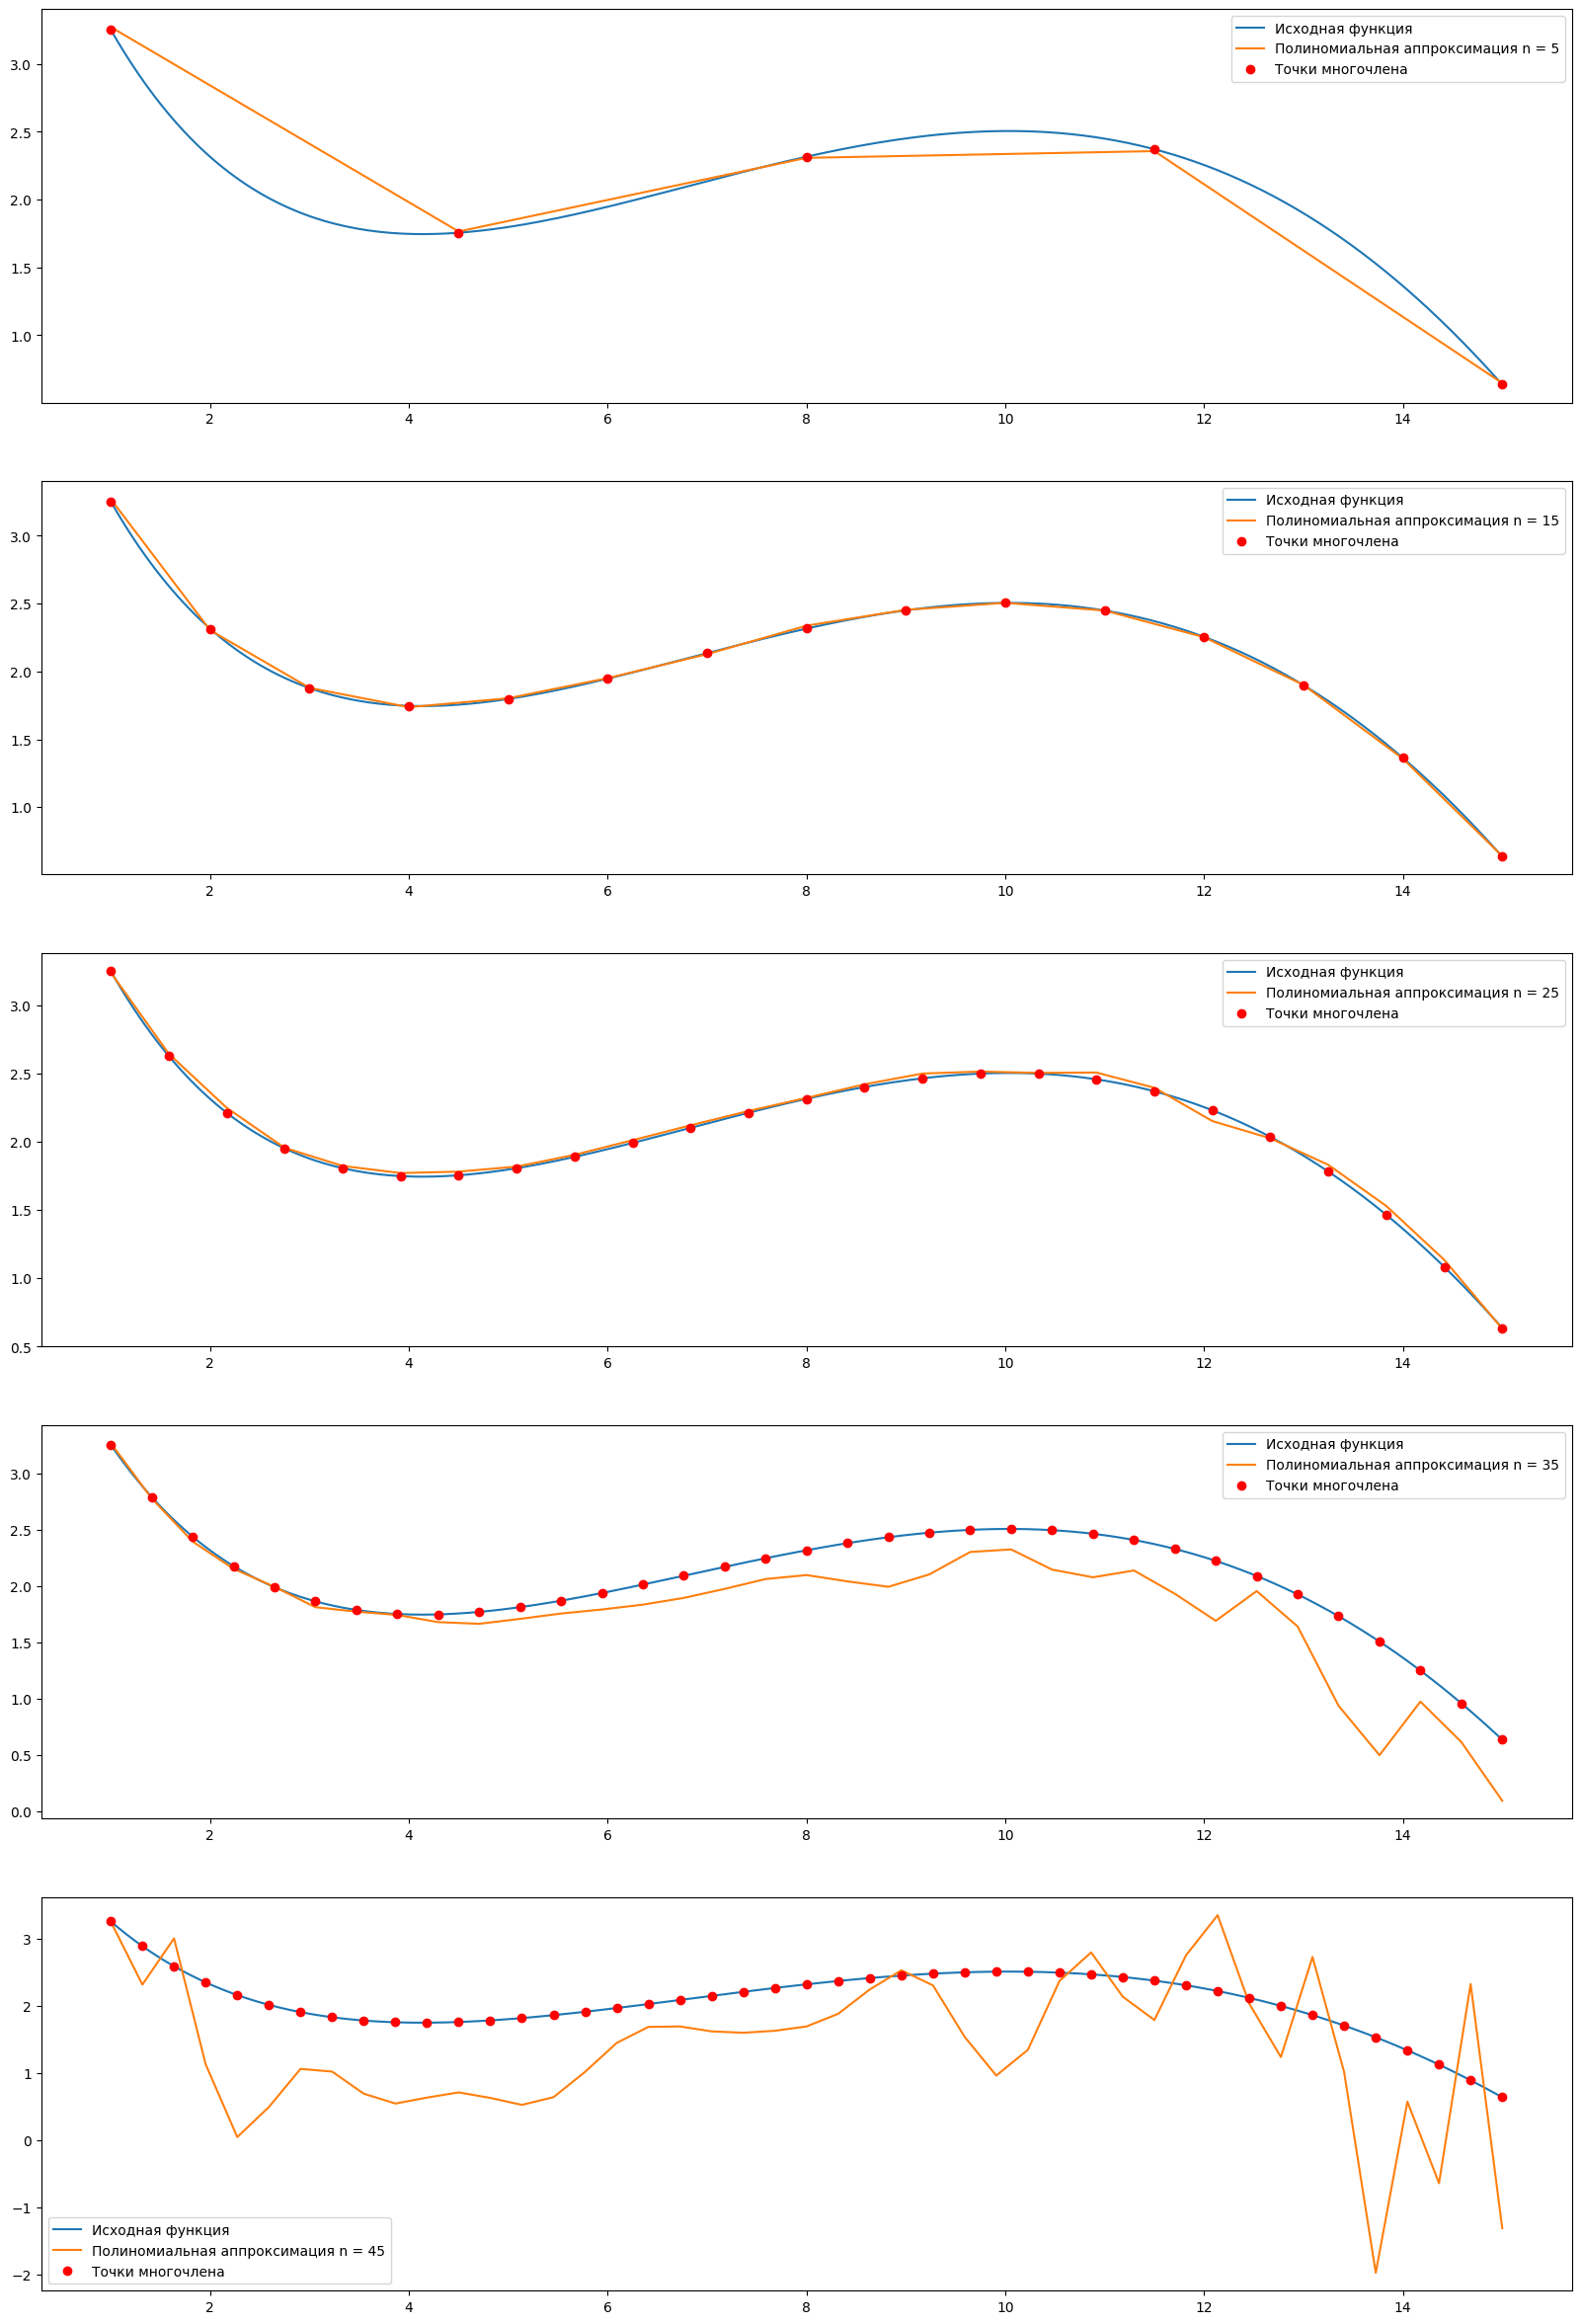

In [47]:
def pol2(n):
    t = np.linspace(1, 15, n)
    a = np.random.normal(0, 0.01, n)
    sol = np.linalg.solve(np.array([[x ** i for i in range(n)] for x in t]), func(t) + a)
    polynomial = np.array([sum([sol[i] * x ** i for i in range(n)]) for x in t])
    return polynomial

fig, axes = plt.subplots(5, figsize=(20, 30))
xx = np.linspace(1, 15, 250)
yy = func(xx)

i = 0
for n in range(5, 50, 10):
    axes[i].plot(xx, yy, label = 'Исходная функция')
    x = np.linspace(1, 15, n)
    y, b = pol2(n), func(x)
    axes[i].plot(x, y, label = f'Полиномиальная аппроксимация n = {n}')
    axes[i].plot(x, b, "ro", label = 'Точки многочлена')
    axes[i].legend()
    i += 1

### При n = 5 полином приближает плохо, при n = 15 график приближен к исходному. Далее же с увеличением колличества точек n график скачет, шум влияет на аппроксимацию

## 3. Метод наименьших квадратов

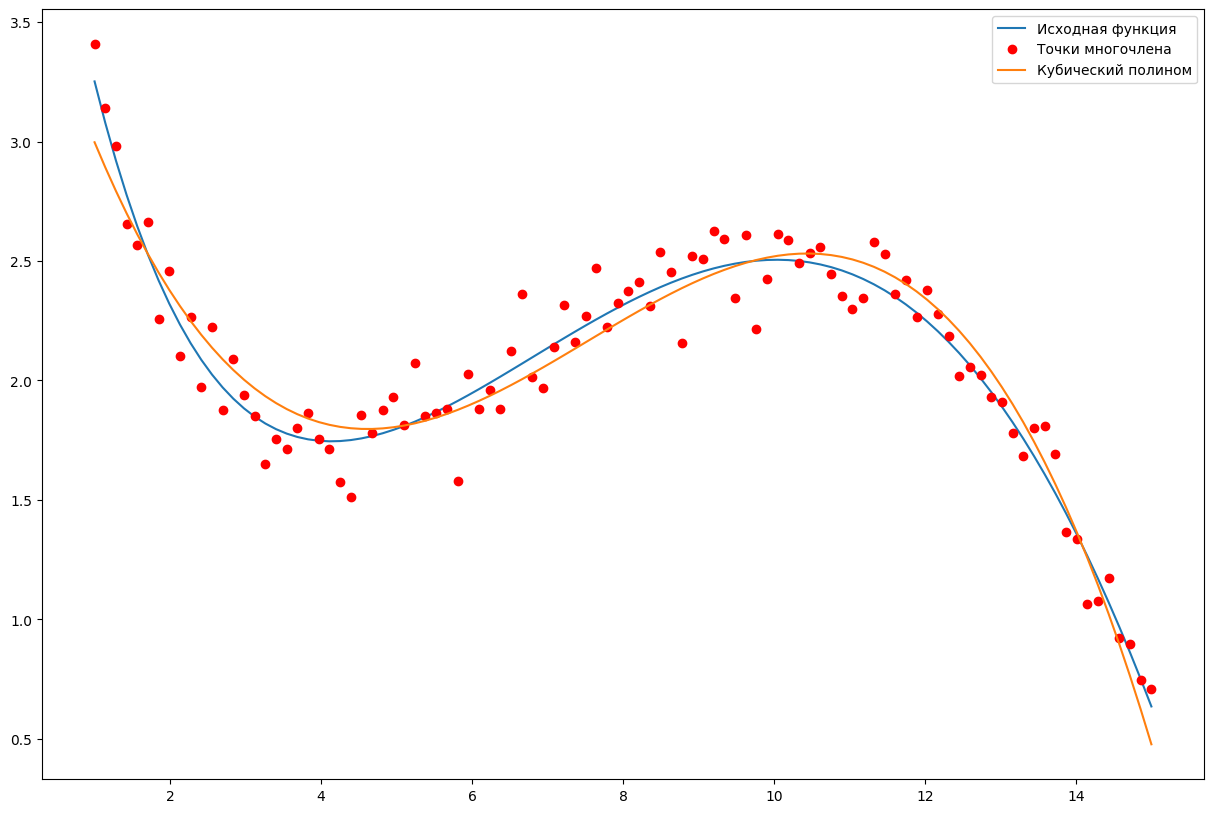

In [57]:
def MLS(n):
    N = 4
    t = np.linspace(1, 15, n)
    a = np.random.normal(0, 0.1, n)
    sol, b, c, d = np.linalg.lstsq(np.array([[x ** i for i in range(N)] for x in t]), func(t) + a, rcond=None)
    polynomial = np.array([sum([sol[i] * x ** i for i in range(N)]) for x in t])
    return polynomial, func(t) + a

plt.figure(figsize=(15, 10))
x = np.linspace(1, 15, 100)
y = func(x)
plt.plot(x, y, label = 'Исходная функция')
y, b = MLS(100)

plt.plot(x, b, "ro", label = 'Точки многочлена')
plt.plot(x, y, label = 'Кубический полином')
plt.legend()

### Итог: При большем колличестве точек n и отсутсвии шумов, полиномиальная регрессия хорошо аппроксимирует функцию. При наличии шумов регрессия дает наилучший результат при меньших n, при увеличении колличества точек график начинает скакать. В отличие от полиномиальной регрессии, метод наименьших квадратов дает наиболее точное решение при кубическом полиноме